In [164]:
from micromlgen import port
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import random

# TYLKO ŻEBY OBLICZENIA BYŁY ZAWSZE TAKIE SAME
random.seed(123)
np.random.seed(123)

np.set_printoptions(precision=7, suppress=True, threshold=5)

In [165]:
data = pd.read_csv('training.csv',sep='\t')
data

,Left,Middle,Right,Distance,DistanceLeft,DistanceRight,Action
0,0,0,1,46,0,0,L
1,1,0,1,45,0,0,U
2,1,0,1,44,0,0,U
3,1,0,1,41,0,0,U
4,1,0,1,40,0,0,U
...,...,...,...,...,...,...,...
94,1,1,1,77,0,0,R
95,1,1,1,77,0,0,R
96,1,1,0,77,0,0,R
97,1,1,0,90,0,0,R


# CZYTANIE DANYCH

In [166]:
X = data[['Left','Middle','Right','Distance','DistanceLeft','DistanceRight']]
Y = data['Action']

In [167]:
x_train, x_test, y_train,y_test =  train_test_split(X,Y)

In [168]:
y_train

90    R
79    U
9     U
56    U
41    L
     ..
57    U
83    R
17    R
92    R
66    R
Name: Action, Length: 74, dtype: object

# UCZENIE SVM

In [169]:
clf = SVC(kernel='linear', gamma=0.01).fit(x_train, y_train)

In [170]:
accuracy_score(y_test,clf.predict(x_test))

0.76

In [171]:
clf.predict(x_test)

array(['R', 'R', 'R', ..., 'U', 'R', 'R'], dtype=object)

In [172]:
print(port(clf))

#pragma once
namespace Eloquent {
    namespace ML {
        namespace Port {
            class SVM {
                public:
                    SVM() {
                    }

                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        float kernels[41] = { 0 };
                        float decisions[10] = { 0 };
                        int votes[5] = { 0 };
                        kernels[0] = compute_kernel(x,   1.0  , 1.0  , 1.0  , 12.0  , 0.0  , 0.0 );
                        kernels[1] = compute_kernel(x,   1.0  , 1.0  , 1.0  , 68.0  , 0.0  , 0.0 );
                        kernels[2] = compute_kernel(x,   1.0  , 1.0  , 1.0  , 84.0  , 0.0  , 0.0 );
                        kernels[3] = compute_kernel(x,   1.0  , 1.0  , 1.0  , 76.0  , 0.0  , 0.0 );
                        kernels[4] = compute_kernel(x,   1.0  , 1.0  , 0.0  , 80.0  , 0.0  , 0.0 );
                        ke

In [173]:
output_file = port(clf) + "\n\nunsigned char svm_action_classes[] = " + str(list(clf.classes_)).replace("[","{").replace("]","}") + ";"  + """
using namespace Eloquent::ML::Port;
SVM svm = SVM();

unsigned char svm_predict(float *x) {
    return svm_action_classes[svm.predict(x)];
}
"""
print(output_file)

#pragma once
namespace Eloquent {
    namespace ML {
        namespace Port {
            class SVM {
                public:
                    SVM() {
                    }

                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        float kernels[41] = { 0 };
                        float decisions[10] = { 0 };
                        int votes[5] = { 0 };
                        kernels[0] = compute_kernel(x,   1.0  , 1.0  , 1.0  , 12.0  , 0.0  , 0.0 );
                        kernels[1] = compute_kernel(x,   1.0  , 1.0  , 1.0  , 68.0  , 0.0  , 0.0 );
                        kernels[2] = compute_kernel(x,   1.0  , 1.0  , 1.0  , 84.0  , 0.0  , 0.0 );
                        kernels[3] = compute_kernel(x,   1.0  , 1.0  , 1.0  , 76.0  , 0.0  , 0.0 );
                        kernels[4] = compute_kernel(x,   1.0  , 1.0  , 0.0  , 80.0  , 0.0  , 0.0 );
                        ke

In [174]:
with open("car_obstacle_train/obstacle_model_svm.h","w") as f:
    f.write(output_file)

# TENSORFLOW

In [175]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
print(tf.__version__)
tf.random.set_seed(123456)

2.0.0


In [176]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

code = np.array(Y)
label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(code)
label_encoder.classes_

array(['*', 'D', 'L', 'R', 'U'], dtype=object)

In [177]:
from tensorflow.keras.utils import to_categorical
y_train_ = to_categorical(label_encoder.transform(y_train))
y_test_ = to_categorical(label_encoder.transform(y_test))

x_train_ = tf.convert_to_tensor(x_train.astype(float).values)
x_test_ = tf.convert_to_tensor(x_test.astype(float).values)
print(x_train_.shape, y_train_.shape)
print(x_test.shape, y_test_.shape)

(74, 6) (74, 5)
(25, 6) (25, 5)


In [178]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(3, input_shape=(6,), activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer="adam",
              loss='binary_crossentropy',  
              metrics=['accuracy'])
model.summary()

model.fit(x_train_,y_train_, epochs=18)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_41 (Dense)             (None, 5)                 20        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Train on 74 samples
Epoch 1/18
74/74 [==============================] - 0s 6ms/sample - loss: 2.5163 - accuracy: 0.8108
Epoch 2/18
74/74 [==============================] - 0s 67us/sample - loss: 2.5068 - accuracy: 0.8108
Epoch 3/18
74/74 [==============================] - 0s 68us/sample - loss: 2.4969 - accuracy: 0.8108
Epoch 4/18
74/74 [==============================] - 0s 67us/sample - loss: 2.4872 - accuracy: 0.8108
Epoch 5/18
74/74 [==============================] - 0s 67us/sample - loss: 2.4781 - accuracy: 0.

In [179]:
model.predict([x_test_])

array([[0.       , 0.00069  , 0.       , 0.99931  , 0.       ],
       [0.       , 0.       , 0.       , 1.       , 0.       ],
       [0.       , 0.       , 0.       , 1.       , 0.       ],
       ...,
       [0.       , 0.0110441, 0.0000056, 0.9889503, 0.       ],
       [0.0001836, 0.11327  , 0.0032021, 0.883292 , 0.0000523],
       [0.       , 0.       , 0.       , 1.       , 0.       ]],
      dtype=float32)

In [180]:
def encode_output(y):
    return [label_encoder.classes_[i] for i in np.argmax(y,axis=1)]

encode_output(model.predict([x_test_]))

['R',
 'R',
 'R',
 'L',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R']

# WEIGHTS

#### Wszystkie wagi modelu potrzebne do eksportu do C++

In [181]:
model.weights

[<tf.Variable 'dense_40/kernel:0' shape=(6, 3) dtype=float32, numpy=
 array([[ 0.693884 , -0.1836377, -0.4869193],
        [-0.1112254,  0.0940931,  0.4834505],
        [-0.6351829,  0.8122994,  0.3499156],
        [ 0.7303514, -0.2926492, -0.0962359],
        [ 0.4238856,  0.291497 , -0.6941188],
        [-0.3198619,  0.4232637, -0.4152213]], dtype=float32)>,
 <tf.Variable 'dense_40/bias:0' shape=(3,) dtype=float32, numpy=array([-0.0508286,  0.       ,  0.       ], dtype=float32)>,
 <tf.Variable 'dense_41/kernel:0' shape=(3, 5) dtype=float32, numpy=
 array([[-0.4100235,  0.4793676, -0.0144266,  0.7790407, -0.585251 ],
        [ 0.0685366,  0.5928426,  0.7536497, -0.4205679, -0.7062055],
        [ 0.3954012,  0.4625965, -0.2965532, -0.8576401, -0.4547196]],
       dtype=float32)>,
 <tf.Variable 'dense_41/bias:0' shape=(5,) dtype=float32, numpy=
 array([ 0.0306683,  0.0515581,  0.0409896, -0.052255 ,  0.035845 ],
       dtype=float32)>]

#### Jak przelicza każdą warstwę nasz model

In [182]:
# WYSWIETL KAZDY LAYER OSOBNO
from tensorflow.keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions
layer_outs = [func([x_test_]) for func in functors]
layer_outs

[[array([[24.633427 ,  0.       ,  0.       ],
         [63.342056 ,  0.       ,  0.       ],
         [63.342056 ,  0.       ,  0.       ],
         ...,
         [15.345253 ,  0.       ,  0.       ],
         [ 7.2001615,  0.       ,  0.       ],
         [61.97652  ,  0.       ,  0.       ]], dtype=float32)],
 [array([[0.       , 0.00069  , 0.       , 0.99931  , 0.       ],
         [0.       , 0.       , 0.       , 1.       , 0.       ],
         [0.       , 0.       , 0.       , 1.       , 0.       ],
         ...,
         [0.       , 0.0110441, 0.0000056, 0.9889503, 0.       ],
         [0.0001836, 0.11327  , 0.0032021, 0.883292 , 0.0000523],
         [0.       , 0.       , 0.       , 1.       , 0.       ]],
        dtype=float32)]]

### Wyliczenie przy pomocy nunmpy naszego modelu

In [183]:
weight_1 = model.weights[0].numpy()
bias_1 = model.weights[1].numpy()
weight_2 =  model.weights[2].numpy()
bias_2 =  model.weights[3].numpy()


def softmax(z):
    assert len(z.shape) == 2
    s = np.max(z, axis=1)
    s = s[:, np.newaxis] # necessary step to do broadcasting
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis] # dito
    return e_x / div


def predict_np(x):
    arr = np.matmul(x,weight_1) + bias_1
    arr[arr<0] = 0 # relu
    
    print("1 layer:")
    print(arr.shape, arr)
    
    arr = np.matmul(arr, weight_2) + bias_2
    print("2 layer:")
    print(arr.shape, arr)
    return softmax(arr)
print(x_test_)

predict_np(x_test_)

tf.Tensor(
[[ 1.  1.  0. 33.  0.  0.]
 [ 1.  1.  0. 86.  0.  0.]
 [ 1.  1.  0. 86.  0.  0.]
 ...
 [ 1.  0.  1. 21.  0.  0.]
 [ 1.  1.  1. 10.  0.  0.]
 [ 1.  1.  1. 85.  0.  0.]], shape=(25, 6), dtype=float64)
1 layer:
(25, 3) [[24.6334278  0.         0.       ]
 [63.3420545  0.         0.       ]
 [63.3420545  0.         0.       ]
 ...
 [15.3452529  0.         0.       ]
 [ 7.2001616  0.         0.       ]
 [61.9765202  0.         0.       ]]
2 layer:
(25, 5) [[-10.0696162  11.8600256  -0.3143867  19.1381877 -14.380894 ]
 [-25.9410632  30.4156877  -0.8728201  49.2937831 -37.0351578]
 [-25.9410632  30.4156877  -0.8728201  49.2937831 -37.0351578]
 ...
 [ -6.2612462   7.4075754  -0.1803901  11.9023215  -8.9449801]
 [ -2.9215672   3.5030824  -0.0628842   5.5569639  -4.1780569]
 [-25.3811621  29.7610947  -0.8531201  48.2299763 -36.2359774]]


array([[0.       , 0.00069  , 0.       , 0.99931  , 0.       ],
       [0.       , 0.       , 0.       , 1.       , 0.       ],
       [0.       , 0.       , 0.       , 1.       , 0.       ],
       ...,
       [0.       , 0.0110441, 0.0000056, 0.9889503, 0.       ],
       [0.0001836, 0.11327  , 0.0032021, 0.883292 , 0.0000523],
       [0.       , 0.       , 0.       , 1.       , 0.       ]])

In [184]:
model.predict(x_test_)

array([[0.       , 0.00069  , 0.       , 0.99931  , 0.       ],
       [0.       , 0.       , 0.       , 1.       , 0.       ],
       [0.       , 0.       , 0.       , 1.       , 0.       ],
       ...,
       [0.       , 0.0110441, 0.0000056, 0.9889503, 0.       ],
       [0.0001836, 0.11327  , 0.0032021, 0.883292 , 0.0000523],
       [0.       , 0.       , 0.       , 1.       , 0.       ]],
      dtype=float32)

#### Czy predykcja przez numpy i tensorflow jest identyczna ?

In [185]:
np.allclose(model.predict(x_test_),predict_np(x_test_))

1 layer:
(25, 3) [[24.6334278  0.         0.       ]
 [63.3420545  0.         0.       ]
 [63.3420545  0.         0.       ]
 ...
 [15.3452529  0.         0.       ]
 [ 7.2001616  0.         0.       ]
 [61.9765202  0.         0.       ]]
2 layer:
(25, 5) [[-10.0696162  11.8600256  -0.3143867  19.1381877 -14.380894 ]
 [-25.9410632  30.4156877  -0.8728201  49.2937831 -37.0351578]
 [-25.9410632  30.4156877  -0.8728201  49.2937831 -37.0351578]
 ...
 [ -6.2612462   7.4075754  -0.1803901  11.9023215  -8.9449801]
 [ -2.9215672   3.5030824  -0.0628842   5.5569639  -4.1780569]
 [-25.3811621  29.7610947  -0.8531201  48.2299763 -36.2359774]]


True

## Konwersja do .cpp

Zapisujemy do pliku car_obstacle_train/model.h nasz nowy model

https://repl.it/@alexiej/PoorAdmiredConference#main.cpp

In [186]:
## Wartosci dla kazdej warstwy powinny byc identyczne dla podanego przykladu
print([x_test_[0]])
predict_np([x_test_[0]])

[<tf.Tensor: id=24331, shape=(6,), dtype=float64, numpy=array([ 1.,  1.,  0., 33.,  0.,  0.])>]
1 layer:
(1, 3) [[24.6334278  0.         0.       ]]
2 layer:
(1, 5) [[-10.0696162  11.8600256  -0.3143867  19.1381877 -14.380894 ]]


array([[0.     , 0.00069, 0.     , 0.99931, 0.     ]])

## Output

```shelll
1st layer: 24.6334 0 0 
2nd layer: -10.0696 11.86 -0.314387 19.1382 -14.3809 
Softmax: 2.06497e-13 0.000689978 3.56087e-09 0.99931 2.77044e-15 
Argmax: 3 = 'R'
R
```

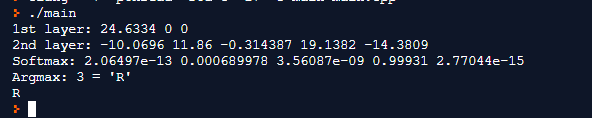

In [187]:
model.weights

[<tf.Variable 'dense_40/kernel:0' shape=(6, 3) dtype=float32, numpy=
 array([[ 0.693884 , -0.1836377, -0.4869193],
        [-0.1112254,  0.0940931,  0.4834505],
        [-0.6351829,  0.8122994,  0.3499156],
        [ 0.7303514, -0.2926492, -0.0962359],
        [ 0.4238856,  0.291497 , -0.6941188],
        [-0.3198619,  0.4232637, -0.4152213]], dtype=float32)>,
 <tf.Variable 'dense_40/bias:0' shape=(3,) dtype=float32, numpy=array([-0.0508286,  0.       ,  0.       ], dtype=float32)>,
 <tf.Variable 'dense_41/kernel:0' shape=(3, 5) dtype=float32, numpy=
 array([[-0.4100235,  0.4793676, -0.0144266,  0.7790407, -0.585251 ],
        [ 0.0685366,  0.5928426,  0.7536497, -0.4205679, -0.7062055],
        [ 0.3954012,  0.4625965, -0.2965532, -0.8576401, -0.4547196]],
       dtype=float32)>,
 <tf.Variable 'dense_41/bias:0' shape=(5,) dtype=float32, numpy=
 array([ 0.0306683,  0.0515581,  0.0409896, -0.052255 ,  0.035845 ],
       dtype=float32)>]

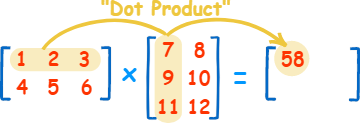

https://repl.it/@alexiej/PoorAdmiredConference#main.cpp


```cpp

/******************************************************************************

                              Online C++ Compiler.
               Code, Compile, Run and Debug C++ program online.
Write your code in this editor and press "Run" button to compile and execute it.

*******************************************************************************/
#include <math.h>
#include <iostream>
#include <string>

/**
 * @brief Calculates the dot product of two float arrays
 * @param[in] float The first float array
 * @param[in] float The second float array
 * @param[in] int Number of elements in the array
 * @return float The result
 */
float dot(float v[], float u[], int n)
{
    float result = 0.0;
    for (int i = 0; i < n; i++)
        result += v[i]*u[i];
    return result;
}

float weight_1[6][3] = {{ 0.69388396, -0.18363768, -0.48691928},
        {-0.11122542,  0.09409314,  0.48345053},
        {-0.6351829 ,  0.8122994 ,  0.34991562},
        { 0.73035145, -0.2926492 , -0.09623587},
        { 0.42388558,  0.291497  , -0.6941188 },
        {-0.31986186,  0.42326367, -0.4152213 }};

float bias_1[3] = { -0.05082855,  0.        ,  0.        };

float weight_2[3][5] = {{-0.4100235 ,  0.4793676 , -0.01442659,  0.7790407 , -0.58525103},
        { 0.06853658,  0.59284264,  0.75364965, -0.42056793, -0.7062055 },
        { 0.39540118,  0.46259648, -0.2965532 , -0.85764015, -0.45471957}};

float bias_2[5] = { 0.0306683,  0.0515581,  0.0409896, -0.052255 ,  0.035845 };

void calculate_layer(float input[], float output[], float *weights, float *bias, int dim_input, int dim_output) {
  for (int i=0; i< dim_output; i++) {
      float result = 0.0;
      for(int k = 0; k < dim_input; k++) {
          result +=   input[k] * weights[k*dim_output + i];
      }
      
      output[i] = result + bias[i];
  }
  return;
}

void relu(float input[], int dim_input) {
    for (int i=0; i< dim_input; i++) {
        input[i] = (input[i] < 0) ? 0 : input[i];
    }
}

void softmax(float input[], int dim_input) {
    float maxv = input[0];
    for (int i=1; i< dim_input; i++) {
        maxv = (input[i]>maxv) ? input[i] : maxv;
    }
//    Serial.print("MAX: "); Serial.print(maxv);
    for (int i = 0; i < dim_input; i++) {
        input[i] = exp(input[i]-maxv);
    }
    float divv = 0;
    for (int i = 0; i < dim_input; i++) {
        divv += input[i];
    }
//    Serial.print(" DIV: "); Serial.print(divv);
    for (int i = 0; i < dim_input; i++) {
        input[i] = input[i]/divv;
    }
}

float layer1_output[3];
float output[5];

unsigned char decoder[5] = { '*', 'D', 'L', 'R', 'U' };


int argmax(float input[],int dim) {
  int max_i = 0;
  float max_v = input[0];
  for(int i=1;i<dim;i++) {
    if(input[i]>max_v) {
      max_i = i;
      max_v = input[i];
    }
  }
  return max_i;
}

unsigned char model_predict(float *input) {
//    Serial.println(); Serial.print("INPUT: "); 
//    for(int i=0;i<5;i++) {
//      Serial.print(input[i]); Serial.print(", "); 
//    }

    calculate_layer(input, layer1_output, &weight_1[0][0], &bias_1[0], 6, 3);
    relu(layer1_output, 3);
    calculate_layer(layer1_output,output ,&weight_2[0][0],&bias_2[0], 3, 5);

//    Serial.println(); Serial.print("MODEL: "); 
//    for(int i=0;i<5;i++) {
//      Serial.print(output[i]); Serial.print(", "); 
//    }
//    
    softmax(output,5);
//    Serial.print(" = "); Serial.print(argmax(output,5));
    return decoder[argmax(output,5)];
}


int main()
{
    float input[6] = { 1. , 1.,0., 33.,  0.,  0. };
    // float input[6] = {1.00	,1.00,	1.00,	100.00,	00	, 00 };
    
    calculate_layer(input, layer1_output, &weight_1[0][0], &bias_1[0], 6, 3);
    relu(layer1_output, 3);
    
    std::cout << "1st layer: ";
    for(int i=0;i<3;i++) {
        std::cout << layer1_output[i] << " ";
    }
    std::cout << "\n";
    
    
    calculate_layer(layer1_output,output ,&weight_2[0][0],&bias_2[0], 3, 5);
    
    std::cout << "2nd layer: ";
    for(int i=0;i<5;i++) {
        std::cout << output[i] << " ";
    }
    std::cout << "\n";
    
    softmax(output,5);
    
    std::cout << "Softmax: ";
    for(int i=0;i<5;i++) {
        std::cout << output[i] << " ";
    }
    std::cout << "\n";

    std::cout << "Argmax: " << argmax(output,5) << " = '" << decoder[argmax(output,5)] << "'\n";

    std::cout << model_predict(input) << "\n";

}



```


## Output

```shelll
1st layer: 24.6334 0 0 
2nd layer: -10.0696 11.86 -0.314387 19.1382 -14.3809 
Softmax: 2.06497e-13 0.000689978 3.56087e-09 0.99931 2.77044e-15 
Argmax: 3 = 'R'
R
```